# Baseball Case Study
Project Description
This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from warnings import filterwarnings
filterwarnings("ignore")

# Data Collection

In [2]:
# collecting a data
df = pd.read_csv("baseball.csv")
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [4]:
# Shape of Dataset
print("Number Of Columns:",df.shape[0])
print("Number Of Columns:",df.shape[1])

Number Of Columns: 30
Number Of Columns: 17


In [5]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

Comments:

1. This dataset contains 16 features which contains statistic summary of the Baseball players and 'W'(wins) is the target      variable which predict the numberof wins.
 
2. Input features in this dataset are: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Runs Average(ERA), Shutouts, Saves, Complete Games and Errors

3. Traget Features: Number of predicted wind(W)

The Column names in our dataset appear to be obscure and require interpretation to become comprehensible. To enhance our understanding of the various columns in the dataset, I've referenced baseball statistics terminology from Wikipedia. 

In [6]:
# Rename of abbreviated columns 
df.rename(columns={'W' : 'Wins',  'R' : 'Runs Scored', 'AB' : 'At Bat', 'H' : 'Hits', '2B' : 'Doubles','3B' : 'Triples','HR' : 'Home Runs', 'BB' : 'Base on Balls', 'SO' : 'Strike Outs','SB' : 'Stolen Base','RA' : 'Runs Average', 'ER' : 'Earned Runs', 'ERA' : 'Earned Run Average',  'CG' : 'Complete Game','SHO' : 'Shut Outs', 'SV' : 'Saves',  'E' : 'Errors'}, inplace=True)
df.head()

,Wins,Runs Scored,At Bat,Hits,Doubles,Triples,Home Runs,Base on Balls,Strike Outs,Stolen Base,Runs Average,Earned Runs,Earned Run Average,Complete Game,Shut Outs,Saves,Errors
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [7]:
# Rename of abbreviated columns
df.rename(columns={'W':'Wins','R':'Runs Scored','AB':'At Bat','H':'Hits','2B':'Doubles','3B':'Triples','HR':'Home Runs','BB':'Base on Balls','SO':'Strike Outs','SB':'Stolen Base','RA':'Runs Average','ER':'Earned Runs','ERA':'Earned Runs Average','CG':'Complete Game','SHO':'Shut Outs','SV':'Saves','E':'Errors'}, inplace=True)
df.head()

,Wins,Runs Scored,At Bat,Hits,Doubles,Triples,Home Runs,Base on Balls,Strike Outs,Stolen Base,Runs Average,Earned Runs,Earned Run Average,Complete Game,Shut Outs,Saves,Errors
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [8]:
# checking Null Values
df.isnull().sum()

Wins                  0
Runs Scored           0
At Bat                0
Hits                  0
Doubles               0
Triples               0
Home Runs             0
Base on Balls         0
Strike Outs           0
Stolen Base           0
Runs Average          0
Earned Runs           0
Earned Run Average    0
Complete Game         0
Shut Outs             0
Saves                 0
Errors                0
dtype: int64

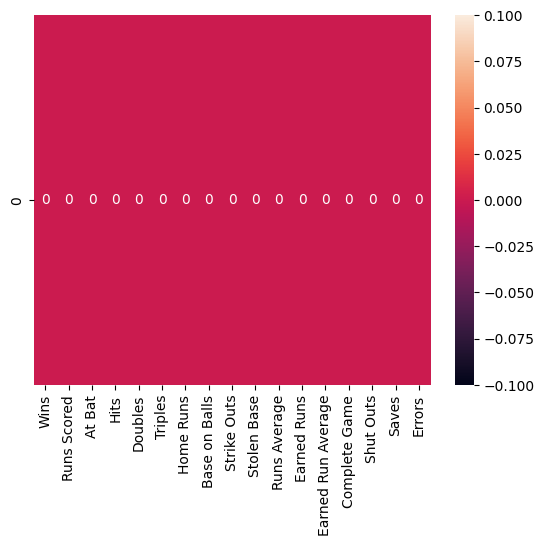

In [9]:
# Checking null values through heatmap
sns.heatmap(df.isnull().sum().to_frame().T, annot=True)
plt.show()

There is no null values in the dataset

# Statistical Analysis

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Wins,30.0,80.966667,10.453455,63.00,74.0000,81.000,87.75,100.00
Runs Scored,30.0,688.233333,58.761754,573.00,651.2500,689.000,718.25,891.00
At Bat,30.0,5516.266667,70.467372,5385.00,5464.0000,5510.000,5570.00,5649.00
Hits,30.0,1403.533333,57.140923,1324.00,1363.0000,1382.500,1451.50,1515.00
Doubles,30.0,274.733333,18.095405,236.00,262.2500,275.500,288.75,308.00
Triples,30.0,31.300000,10.452355,13.00,23.0000,31.000,39.00,49.00
Home Runs,30.0,163.633333,31.823309,100.00,140.2500,158.500,177.00,232.00
Base on Balls,30.0,469.100000,57.053725,375.00,428.2500,473.000,501.25,570.00
Strike Outs,30.0,1248.200000,103.759470,973.00,1157.5000,1261.500,1311.50,1518.00
Stolen Base,30.0,83.500000,22.815225,44.00,69.0000,83.500,96.50,134.00


Statistical Analysis reveals slight right skewness in feature distributions. Consistent counts signify a complete dataset. Potential outliers, esecially in "Errors' and 'Run Scored' warrant attention. Heatmap highlights the need for feature scaling.

<Axes: >

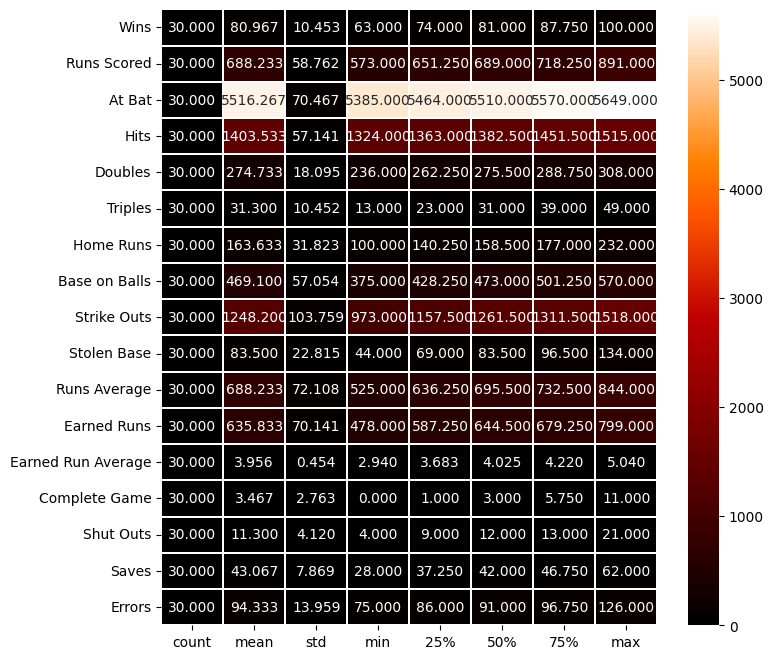

In [11]:
plt.figure(figsize=(8,8))
sns.heatmap(df.describe().T,linewidth=0.2,fmt='0.3f',annot=True,cmap='gist_heat')

# Exploratory Data Analysis

# Outlier Detection

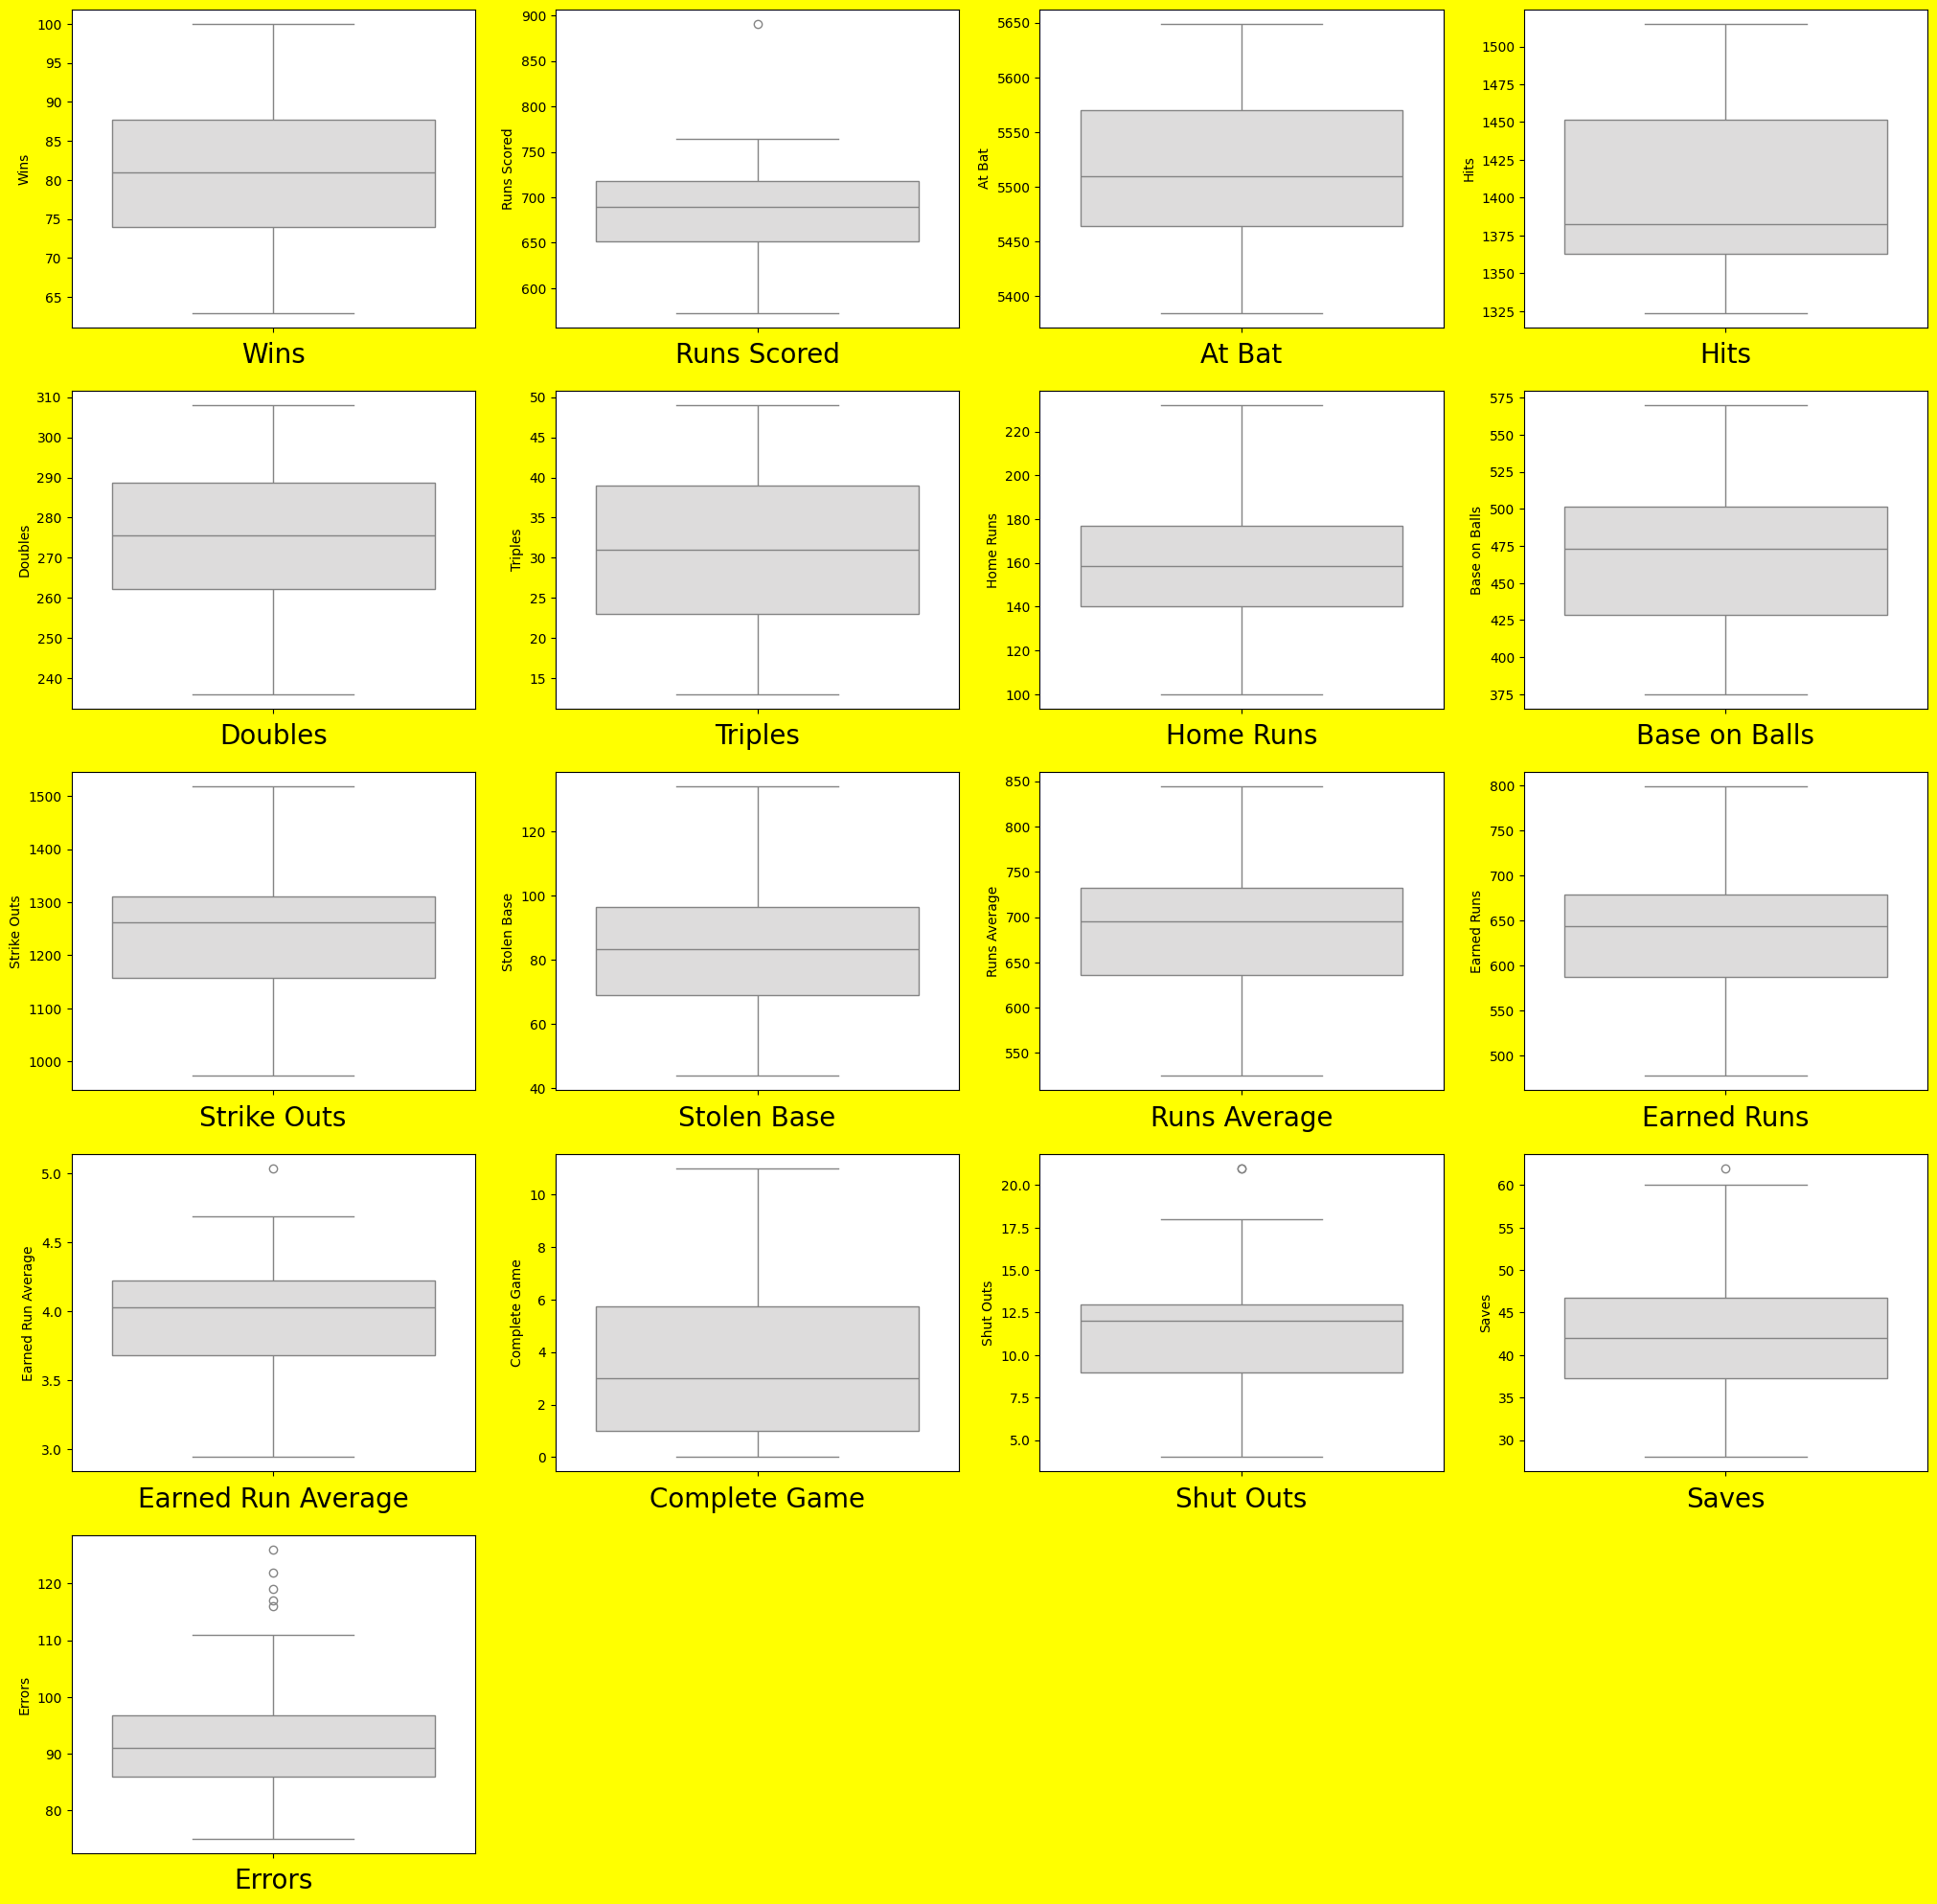

In [12]:
plt.figure(figsize=(25,25),facecolor='yellow')
index=1
for column in df:
    if index <=17:
        ax = plt.subplot(5,4,index)
        sns.boxplot(df[column], palette='coolwarm')
        plt.xlabel(column,fontsize=20)
    index+=1
plt.show()

We can easily find out outlier in ('Runs Scored','Earned Run Average','Shut Out','Saves' and 'Errors') that columns.
We can preceed accordingly.

# Outlier Removel

In [13]:
from scipy.stats import zscore
z_score= np.abs(zscore(df))

# Set a threshold(3)
threshold = 3

# Remove outlier
df1 = df[(z_score<threshold).all(axis=1)]

In [14]:
# shape after removing outliers
print("Shape of dataset after removing outliers:",df1.shape)

Shape of dataset after removing outliers: (29, 17)


In [15]:
# Data Loss
print("Persentage Data Loss:",((30-29)/30)*100,'%')

Persentage Data Loss: 3.3333333333333335 %


# Checking Skewness

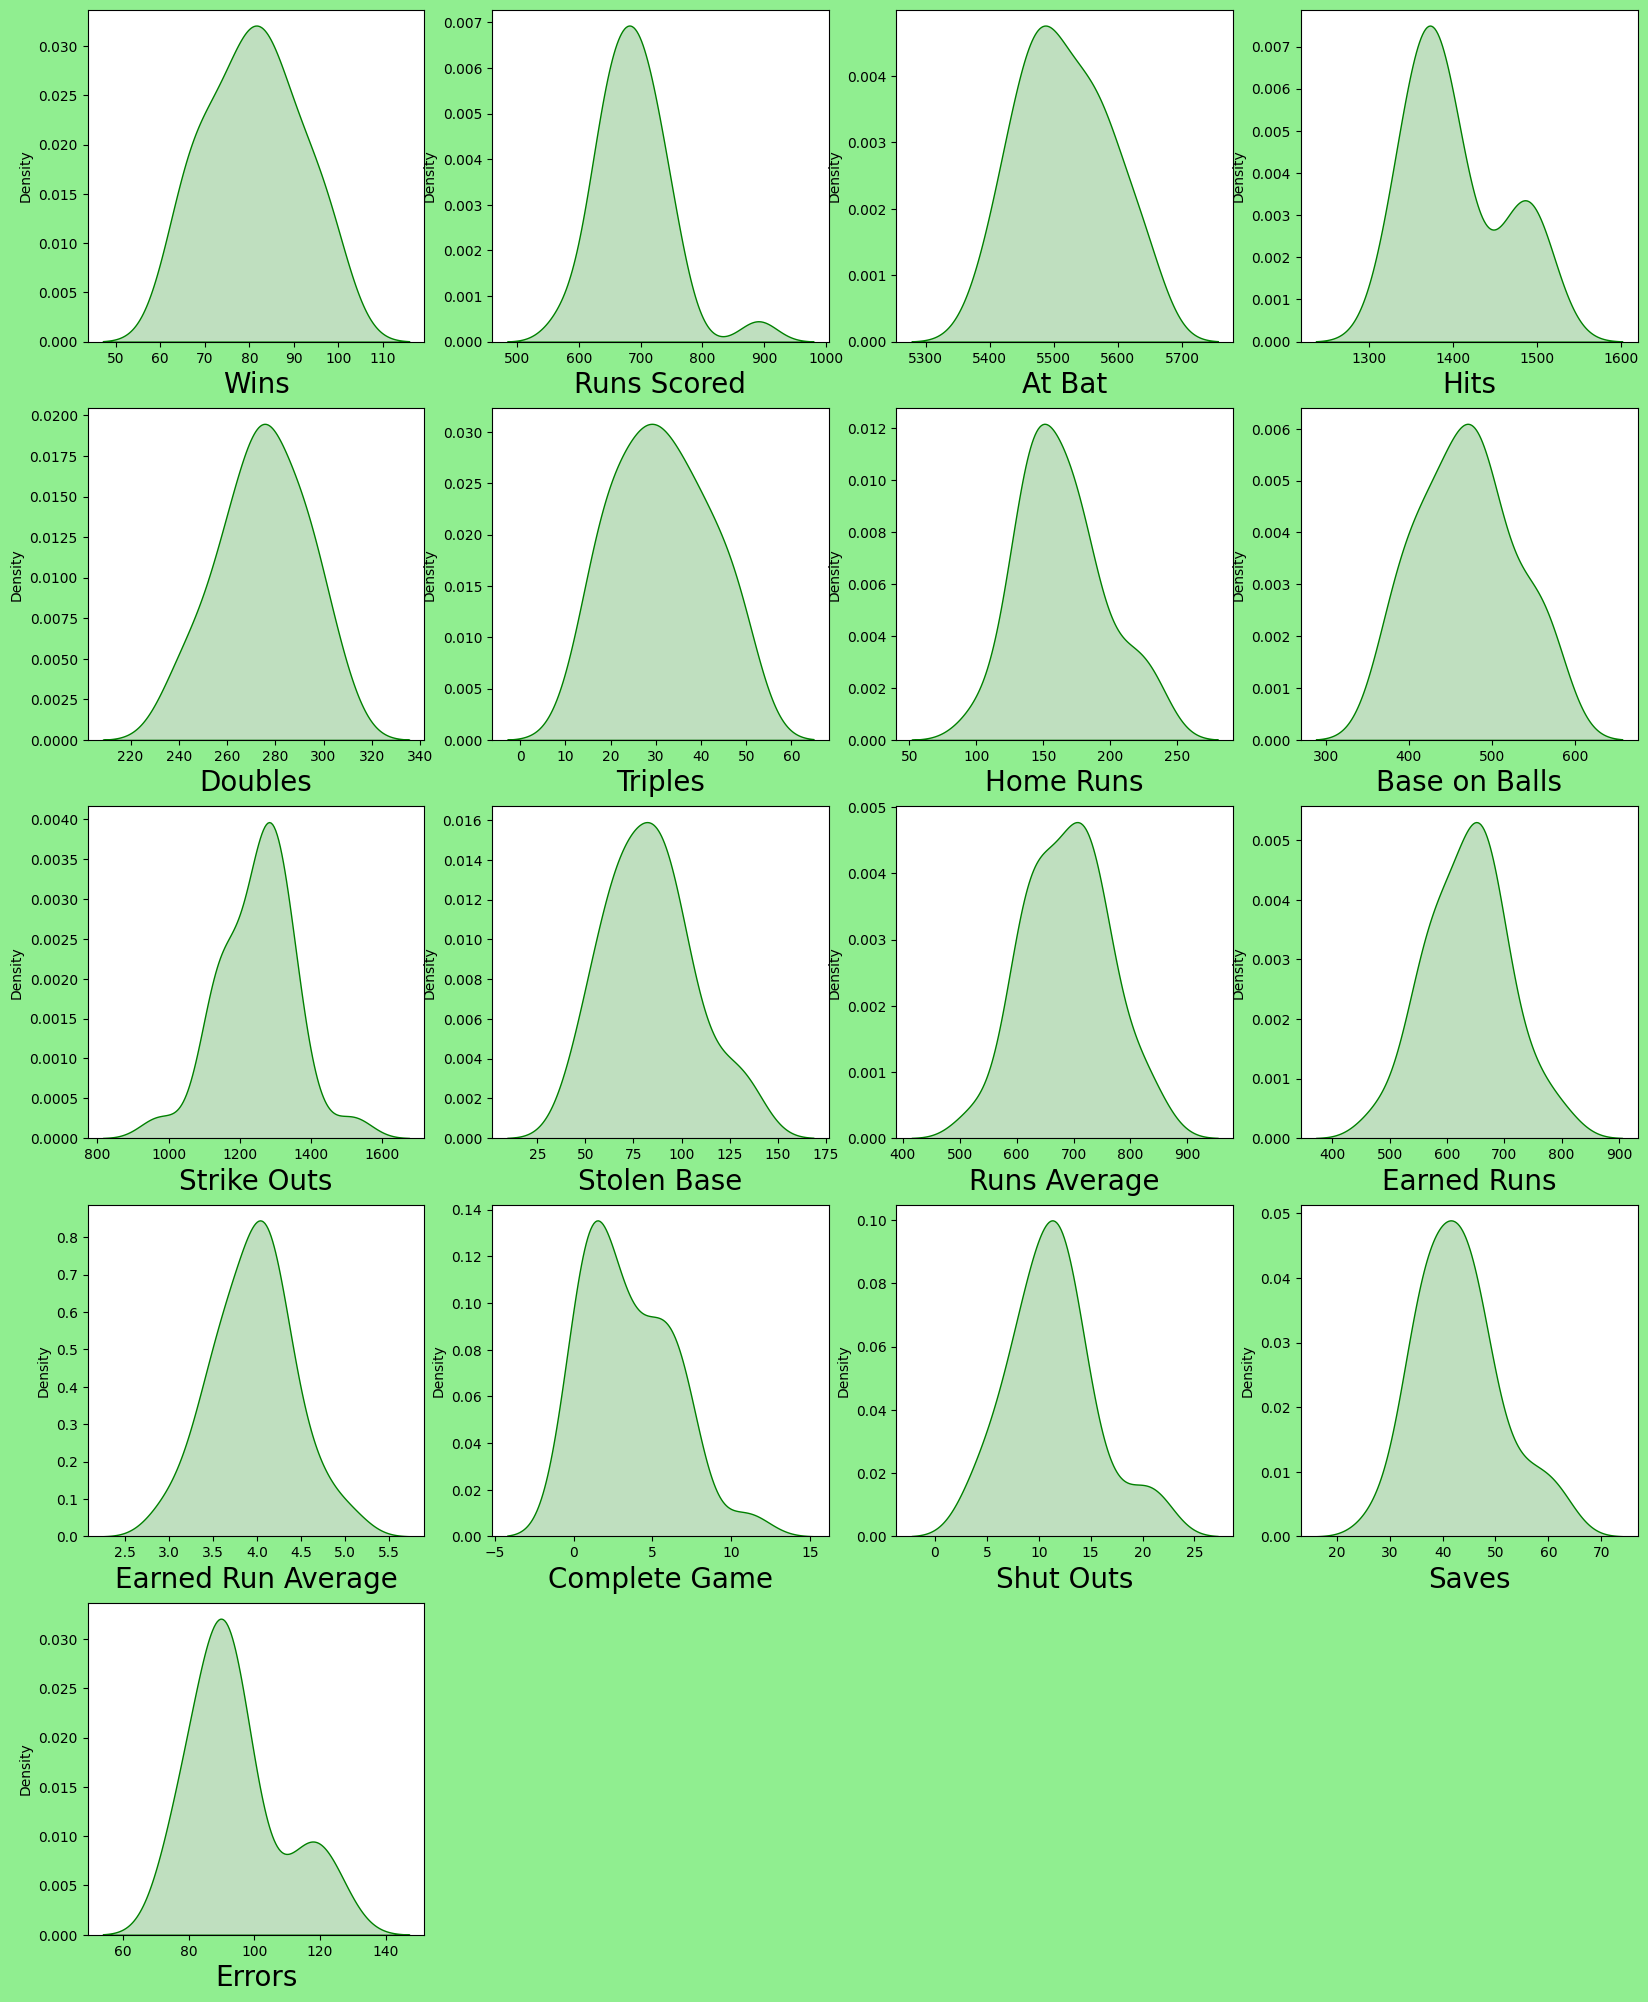

In [16]:
plt.figure(figsize=(20,25), facecolor='lightgreen')
plotnumber=1
for column in df:
    if plotnumber <=17:
        ax = plt.subplot(5,4,plotnumber)
        sns.distplot(df[column], color='g',hist=False,kde_kws={"shade": True})
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()    

'Runs Scored','Complete Game','Shut Outs' and 'Errors' columns have slightly skewed and it will need to be treated accordingly. Rest columns are Normally distributed.

In [17]:
df1.skew()

Wins                  0.119013
Runs Scored          -0.215364
At Bat                0.169573
Hits                  0.783772
Doubles              -0.335304
Triples               0.090124
Home Runs             0.450862
Base on Balls         0.151193
Strike Outs          -0.233815
Stolen Base           0.494966
Runs Average          0.018155
Earned Runs           0.018461
Earned Run Average    0.016693
Complete Game         0.854980
Shut Outs             0.526943
Saves                 0.627480
Errors                0.840271
dtype: float64

-Optimal Range for skewness is -0.5 to 0.5.

-Hits, Complete Game, Shuts Outs, Saves, Errors are positively Skewed in nature, need to transform.

In [18]:
df1.columns

Index(['Wins', 'Runs Scored', 'At Bat', 'Hits', 'Doubles', 'Triples',
       'Home Runs', 'Base on Balls', 'Strike Outs', 'Stolen Base',
       'Runs Average', 'Earned Runs', 'Earned Run Average', 'Complete Game',
       'Shut Outs', 'Saves', 'Errors'],
      dtype='object')

# Removing Skewness of Dataset using the LOGARITHMIC Transformation.

Applying the logarithmic transformation tends to compress higher values more that lower values, helping to reduce right skewness.

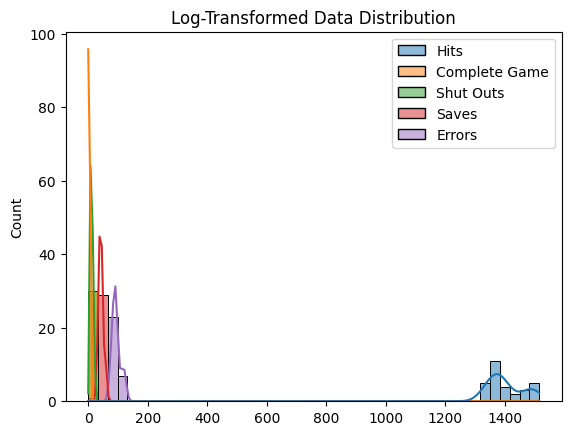

In [19]:
column_name=['Hits','Complete Game','Shut Outs','Saves','Errors']

# log transformation
df1[column_name] = np.log1p(df[column_name])

# plot the transformed data to check for skewness
sns.histplot(df[column_name],kde=True)
plt.title("Log-Transformed Data Distribution")
plt.show()

In [20]:
df1.skew()

Wins                  0.119013
Runs Scored          -0.215364
At Bat                0.169573
Hits                  0.738455
Doubles              -0.335304
Triples               0.090124
Home Runs             0.450862
Base on Balls         0.151193
Strike Outs          -0.233815
Stolen Base           0.494966
Runs Average          0.018155
Earned Runs           0.018461
Earned Run Average    0.016693
Complete Game        -0.275681
Shut Outs            -0.598073
Saves                 0.109983
Errors                0.586101
dtype: float64

All features skewness is now transform within permissible limit of -0.5 to 0.5 as shown above

# Correlation Between Dataset Columns

In [21]:
df1.corr()

,Wins,Runs Scored,At Bat,Hits,Doubles,Triples,Home Runs,Base on Balls,Strike Outs,Stolen Base,Runs Average,Earned Runs,Earned Run Average,Complete Game,Shut Outs,Saves,Errors
Wins,1.000000,0.390451,-0.085780,-0.020785,0.384886,-0.206737,0.245697,0.447513,0.156469,-0.169503,-0.823176,-0.815308,-0.826952,0.000122,0.453544,0.756909,-0.075008
Runs Scored,0.390451,1.000000,0.438022,0.432236,0.469293,0.134204,0.586894,0.258450,0.081158,0.075323,-0.013858,0.007727,-0.009122,0.164021,-0.149756,0.080162,0.041193
At Bat,-0.085780,0.438022,1.000000,0.770154,0.490752,0.445604,-0.064653,-0.137850,-0.111243,0.373674,0.315499,0.309146,0.254872,-0.056349,-0.189899,-0.142034,0.321833
Hits,-0.020785,0.432236,0.770154,1.000000,0.527354,0.579735,-0.219201,-0.221773,-0.373301,0.420199,0.243639,0.279956,0.255886,0.062589,-0.122689,-0.099684,-0.012775
Doubles,0.384886,0.469293,0.490752,0.527354,1.000000,0.342419,-0.098695,0.211243,-0.096772,0.194308,-0.215196,-0.224993,-0.248212,0.226900,0.089038,0.246600,0.146978
Triples,-0.206737,0.134204,0.445604,0.579735,0.342419,1.000000,-0.369299,-0.404852,-0.196586,0.483818,0.312750,0.333731,0.325883,-0.002910,-0.074680,-0.259901,0.098532
Home Runs,0.245697,0.586894,-0.064653,-0.219201,-0.098695,-0.369299,1.000000,0.336814,0.479914,-0.166072,-0.092586,-0.062094,-0.070756,0.126024,-0.062520,0.100228,-0.182374
Base on Balls,0.447513,0.258450,-0.137850,-0.221773,0.211243,-0.404852,0.336814,1.000000,0.315566,-0.117622,-0.425381,-0.455832,-0.465794,0.448140,0.395394,0.205211,-0.052376
Strike Outs,0.156469,0.081158,-0.111243,-0.373301,-0.096772,-0.196586,0.479914,0.315566,1.000000,0.038188,-0.140570,-0.177655,-0.195362,-0.068395,0.171246,0.119732,0.152594
Stolen Base,-0.169503,0.075323,0.373674,0.420199,0.194308,0.483818,-0.166072,-0.117622,0.038188,1.000000,0.134315,0.146243,0.128848,-0.042099,-0.091051,-0.193739,0.078008


<Axes: >

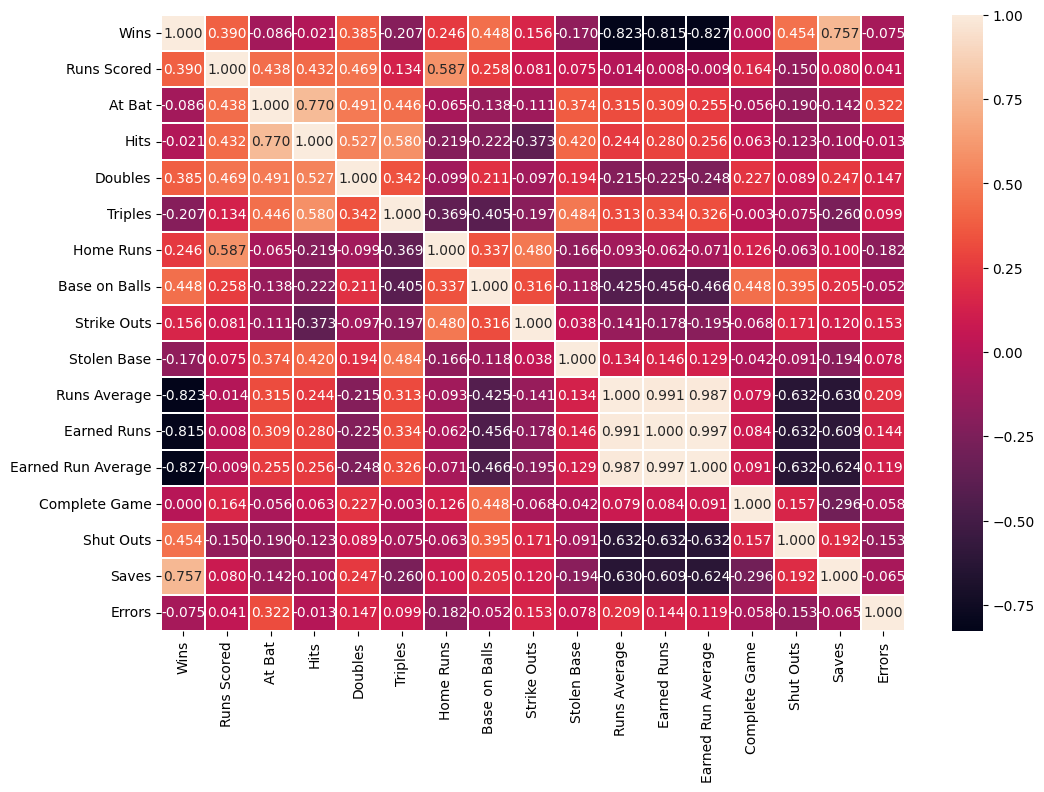

In [22]:
# We can analyse correlation through heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df1.corr(),linewidth=0.1,fmt='0.3f',annot=True)

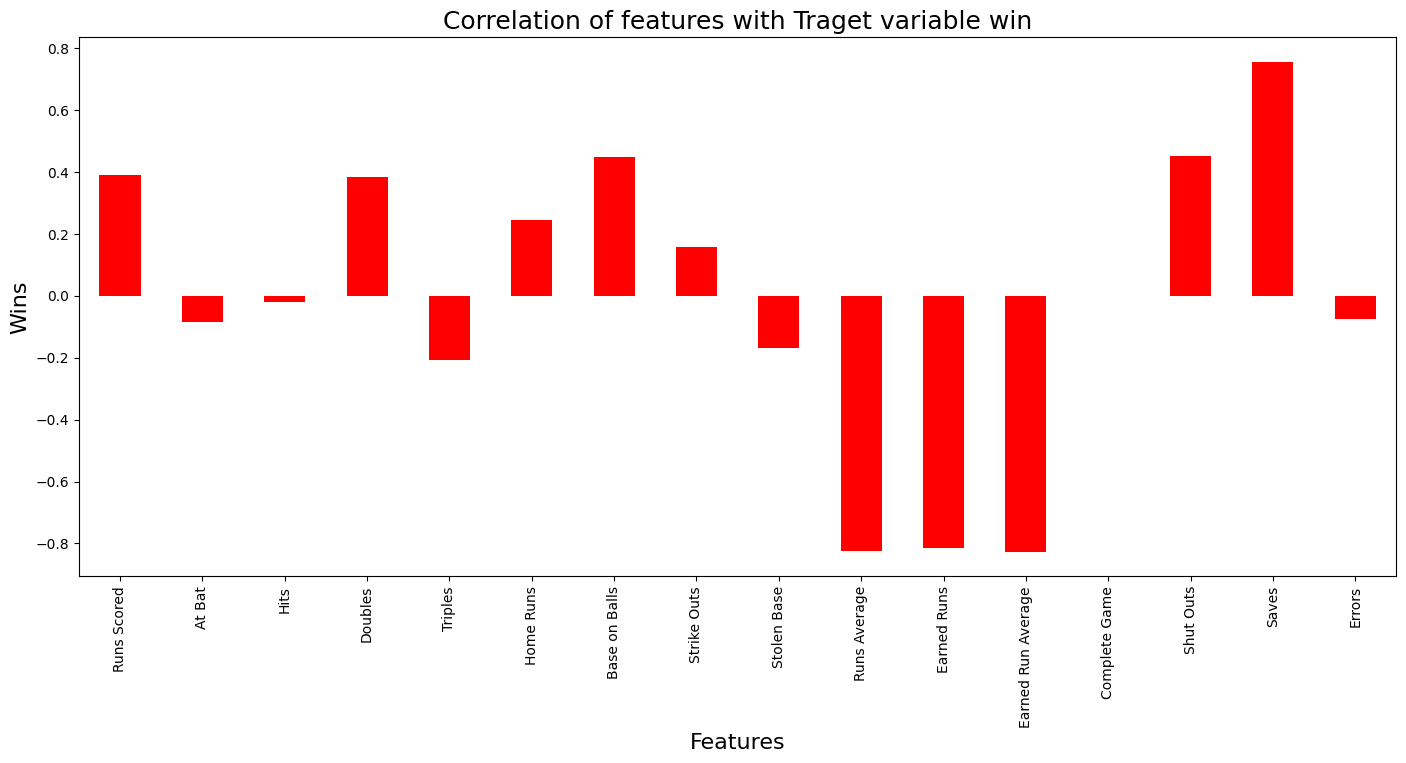

In [23]:
plt.figure(figsize = (17,7))
df1.corr()['Wins'].drop(['Wins']).plot(kind='bar',color='r')
plt.xlabel('Features', fontsize=16)
plt.ylabel('Wins',fontsize=16)
plt.title("Correlation of features with Traget variable win",fontsize=18)
plt.show()

We can observe the correlation of dataset through this heatmap and bar graph.
'Runs Average','Earned Runs' and 'Earned Run Average' have strong correlation. And these columns have negative corelation to column(Wins).

In [24]:
# Checking multicollinearity using Varience-inflation-factor (VIF)
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(df1.values,i) for i in range(df.shape[1])]
vif['Features'] = df1.columns
vif

,VIF,Features
0,1251.442420,Wins
1,2617.409490,Runs Scored
2,125947.045153,At Bat
3,129711.729334,Hits
4,994.113778,Doubles
5,33.608740,Triples
6,205.509670,Home Runs
7,258.650713,Base on Balls
8,411.701884,Strike Outs
9,27.235606,Stolen Base


Here we can see that 'Runs Average','Earned Run Average' are highly correlated. And reason is not scaled.

# Standard Scaling

In [25]:
X=df1.iloc[:,1:-1]
y=df1.iloc[:,0]

In [26]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [27]:
X_scaled=scaler.fit_transform(X)

variables with high VIF (typically VIF > 5 or 10), you may consider removing one of the highly correlated variables to address multicollinearity.

# Principal component Analysis (PCA)

PCA is a dimensionality reduction technique that transforms correlated variables into a set of linearly uncorrelated variables (Principal components).

Implementing PCA can help address multicollinearity.

In [29]:
from sklearn.decomposition import PCA

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

In [30]:
X_=pd.DataFrame(X_pca,columns=np.arange(15))

Variables with high VIF (typically VIF>5 or 10), you may consider removing one of the highly correlated variables to address multicollinearity.

In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


vif_data = pd.DataFrame()
vif_data["Features List"]=X.columns
vif_data["VIF Value"]=[variance_inflation_factor(X_.values,i)
                       for i in range(len(X_.columns))]
vif_data

,Features List,VIF Value
0,Runs Scored,1.0
1,At Bat,1.0
2,Hits,1.0
3,Doubles,1.0
4,Triples,1.0
5,Home Runs,1.0
6,Base on Balls,1.0
7,Strike Outs,1.0
8,Stolen Base,1.0
9,Runs Average,1.0


In [38]:
X_.skew()

0     0.072786
1    -0.103351
2     0.093333
3    -0.183638
4     0.231328
5     0.113868
6     0.695706
7     0.041014
8     0.147935
9     0.742452
10    0.776093
11    0.079855
12    0.234348
13    0.344537
14    0.341381
dtype: float64

# Machine Learning Model

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

# Linear Regression

In [41]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [52]:
maxR2_score = 0
maxRS = 0
for i in range (0,200):
    X_train,X_test,y_train,y_test = train_test_split(X_,y,random_state=i,test_size=.2)
    lr.fit(X_train,y_train)
    y_pred= lr.predict(X_test)
    R2=r2_score(y_test,y_pred)
    if R2>maxR2_score:
        maxR2_score=R2
        maxRS=i
print('Best R2 Score is:',(maxR2_score)*100,'\nAt Random State:',maxRS)

Best R2 Score is: 95.16954924533552 
At Random State: 160


# Prediction Base On Model

In [53]:
pred_data = pd.DataFrame({'predicted values':y_pred,'actual values':y_test})
pred_data

,predicted values,actual values
16,95.740593,98
13,80.387415,76
27,83.069431,79
26,86.818529,84
15,95.699083,100
10,87.239777,88


# Evaluation Metrics

In [54]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
print('\033[1m'+'Error:'+'\033[0m')
print('\nMean absolute error:',mean_absolute_error(y_test,y_pred))
print('\nMean squared error:',mean_squared_error(y_test,y_pred))
print('\nRoot Mean Sqaured Error:',np.sqrt(mean_squared_error(y_test,y_pred)))

Error:

Mean absolute error: 3.0993203087985464

Mean squared error: 11.322422054473584

Root Mean Sqaured Error: 3.3648806894856738


# Logistic Regression

In [55]:
from sklearn.linear_model import LogisticRegression
lgr= LogisticRegression()

In [56]:
maxR2_score = 0
maxRS = 0
for i in range (0,200):
    X_train,X_test,y_train,y_test = train_test_split(X_,y,random_state=i,test_size=.2)
    lgr.fit(X_train,y_train)
    y_pred1= lgr.predict(X_test)
    R2=r2_score(y_test,y_pred1)
    if R2>maxR2_score:
        maxR2_score=R2
        maxRS=i
print('Best R2 Score is:',(maxR2_score)*100,'\nAt Random State:',maxRS)

Best R2 Score is: 92.44296577946768 
At Random State: 64


In [57]:
pred_data1 = pd.DataFrame({'predicted values':y_pred1,'actual values':y_test})
pred_data1

,predicted values,actual values
16,90,98
13,74,76
27,74,79
26,95,84
15,80,100
10,83,88


# Decision Tree Classifier

In [58]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

In [82]:
maxR2_score = 0
maxRS = 0
for i in range (0,200):
    X_train,X_test,y_train,y_test = train_test_split(X_,y,random_state=i,test_size=.2)
    dtc.fit(X_train,y_train)
    y_pred2= dtc.predict(X_test)
    R2=r2_score(y_test,y_pred2)
    if R2>maxR2_score:
        maxR2_score=R2
        maxRS=i
print('Best R2 Score is:',(maxR2_score)*100,'\nAt Random State:',maxRS)

Best R2 Score is: 80.83716428744255 
At Random State: 97


In [83]:
pred_data2 = pd.DataFrame({'predicted values':y_pred2,'actual values':y_test})
pred_data2

,predicted values,actual values
16,97,98
13,83,76
27,68,79
26,83,84
15,80,100
10,86,88


# Hyper Parameter Tuning

In [84]:
from sklearn.model_selection import GridSearchCV
lr = LinearRegression()
param={'fit_intercept':[True,False],
      'copy_X':[True,False],
      'positive':[True,False],
      'n_jobs':[-2,-1,1]}

In [85]:
gsv=GridSearchCV(lr,param,cv=5)

In [86]:
gsv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False], 'n_jobs': [-2, -1, 1],
                         'positive': [True, False]})

In [91]:
gsv.best_params_

{'copy_X': True, 'fit_intercept': True, 'n_jobs': -2, 'positive': False}

In [92]:
model = LinearRegression(fit_intercept=True,copy_X=True,n_jobs=-2,positive=False)

In [94]:
model.fit(X_train,y_train)
pred = model.predict(X_test)
print('R2 Score:',r2_score(y_test,pred))
print('Mean Absolute Error:',mean_absolute_error(y_test,pred))
print('Mean Squared Error:',mean_squared_error(y_test,pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred)))

R2 Score: 0.8594942454460361
Mean Absolute Error: 3.0993203087985464
Mean Squared Error: 11.322422054473584
Root Mean Squared Error: 3.3648806894856738


In [95]:
prediction_ = pd.DataFrame({'predicted values':pred,'actual values':y_test})
prediction_

,predicted values,actual values
16,95.740593,98
13,80.387415,76
27,83.069431,79
26,86.818529,84
15,95.699083,100
10,87.239777,88


Saving most deficient model

# Saving a Model

In [96]:
import joblib
joblib.dump(model,'Baseball_model.pkl')

['Baseball_model.pkl']